In [1]:
import os
from dev.constants import gdrive_path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
path = f"{gdrive_path}/climatex/topics"

scores, files = {}, os.listdir(path)
for file in files:
    report = file[:3]
    claims = pd.read_json(f"{path}/{file}", orient="records", lines=True)
    for topic in claims["topic"].unique():
        if topic == "other" or topic is None: continue
        if topic not in scores.keys(): 
            scores[topic] = {}
            for r in ["AR3", "AR4", "AR5", "AR6"]:
                scores[topic][r] = {tag: 0 for tag in ["very_low", "low", "medium", "high", "very_high"]}

        tags = claims.loc[claims["topic"] == topic, "tag"].tolist()
        for tag in ["very_low", "low", "medium", "high", "very_high"]:
            scores[topic][report][tag] += len([x for x in tags if x == tag])

for topic in scores.keys():
    for report in ["AR3", "AR4", "AR5", "AR6"]:
        totals = [scores[topic][report][tag] for tag in ["very_low", "low", "medium", "high", "very_high"]]
        if sum(totals) == 0: 
            del scores[topic][report]
        else:
            totals = [x / sum(totals) for x in totals]
            totals = sum([x * y for x, y in zip(totals, [-2, -1, 0, 1, 2])])
            scores[topic][report] = totals

In [6]:
ar3_scores = [scores[topic]["AR3"] for topic in scores if "AR3" in scores[topic].keys()]
ar4_scores = [scores[topic]["AR4"] for topic in scores if "AR4" in scores[topic].keys()]
ar5_scores = [scores[topic]["AR5"] for topic in scores if "AR5" in scores[topic].keys()]
ar6_scores = [scores[topic]["AR6"] for topic in scores if "AR6" in scores[topic].keys()]

for x in [ar3_scores, ar4_scores, ar5_scores, ar6_scores]:
    print(len(x))

14
11
26
29


In [8]:
not_in_all = [topic for topic in scores if len(scores[topic]) < 4]
[(x, list(scores[x].keys())) for x in not_in_all]

[('precipitation', ['AR3', 'AR5', 'AR6']),
 ('tropical_islands', ['AR3', 'AR5', 'AR6']),
 ('peat', ['AR3', 'AR5', 'AR6']),
 ('bioenergy', ['AR3', 'AR5', 'AR6']),
 ('emissions', ['AR4', 'AR5', 'AR6']),
 ('geoengineering', ['AR5', 'AR6']),
 ('climate_models', ['AR5', 'AR6']),
 ('ocean_acidification', ['AR5', 'AR6']),
 ('finance', ['AR5', 'AR6']),
 ('sea_level', ['AR5', 'AR6']),
 ('aerosols', ['AR5', 'AR6']),
 ('sustainable_development', ['AR5', 'AR6']),
 ('temperature', ['AR5', 'AR6']),
 ('decision_making', ['AR5', 'AR6']),
 ('coasts', ['AR5', 'AR6']),
 ('energy', ['AR5', 'AR6']),
 ('transport', ['AR6']),
 ('technology', ['AR6']),
 ('mountains', ['AR6'])]

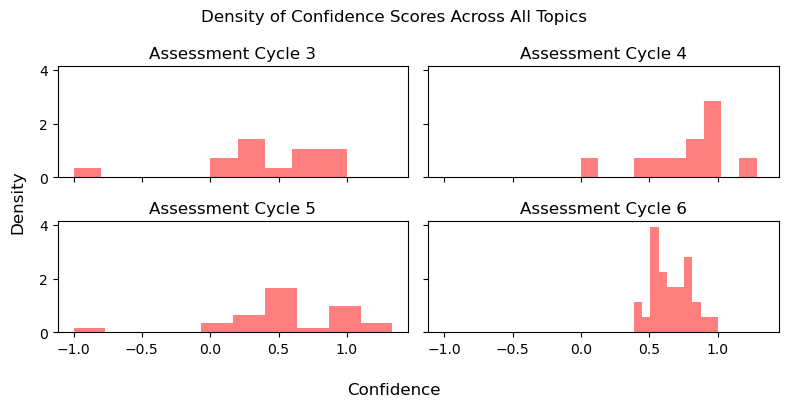

In [11]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, squeeze=True, figsize=(8, 4))

titles = ["Assessment Cycle 3", "Assessment Cycle 4", "Assessment Cycle 5", "Assessment Cycle 6"]
for ax, _scores, title in zip(axs.flatten(), [ar3_scores, ar4_scores, ar5_scores, ar6_scores], titles):
    ax.hist(_scores, color="red", alpha=0.5, density=True)
    ax.set_title(title)

fig.supxlabel("Confidence")
fig.supylabel("Density")
fig.suptitle("Density of Confidence Scores Across All Topics")
plt.tight_layout()
plt.savefig(f"{gdrive_path}/climatex/confidence_score_density.png", dpi=400)
plt.show()

In [16]:
path = f"{gdrive_path}/climatex/topics"

scores, files = {}, os.listdir(path)
for file in files:
    report = file[:3]
    claims = pd.read_json(f"{path}/{file}", orient="records", lines=True)
    for topic in claims["topic"].unique():
        if topic == "other" or topic is None: continue
        if topic not in scores.keys(): 
            scores[topic] = {}
            for r in ["AR3", "AR4", "AR5", "AR6"]:
                scores[topic][r] = {tag: 0 for tag in ["very_low", "low", "medium", "high", "very_high"]}

        tags = claims.loc[claims["topic"] == topic, "tag"].tolist()
        for tag in ["very_low", "low", "medium", "high", "very_high"]:
            scores[topic][report][tag] += len([x for x in tags if x == tag])

for topic in scores.keys():
    for report in ["AR3", "AR4", "AR5", "AR6"]:
        totals = [scores[topic][report][tag] for tag in ["very_low", "low", "medium", "high", "very_high"]]
        if sum(totals) == 0: 
            del scores[topic][report]
        else:
            totals = [x / sum(totals) for x in totals]
            scores[topic][report] = totals

votes_df = pd.DataFrame()
topics = list(scores.keys())
votes_df["topic"] = topics
for report in ["AR3", "AR4", "AR5", "AR6"]:
    votes= []
    for topic in topics:
        if report not in scores[topic].keys():
            votes.append(-1)
        else:
            vote = np.argmax(scores[topic][report])
            votes.append(vote)
    votes_df[report] = votes

In [18]:
votes_df

,topic,AR3,AR4,AR5,AR6
0,polar_regions,4,2,2,3
1,forests,2,3,3,3
2,farming,2,2,2,3
3,disease,2,2,3,3
4,biodiversity,3,3,3,3
5,water,2,4,2,3
6,migration,1,3,3,3
7,australasia,2,3,3,3
8,precipitation,1,-1,2,3
9,fishing,3,2,3,3


In [21]:
topic_order = [
    "climate_models",
    "temperature",
    "biodiversity",
    "marine_ecosystems",
    "ocean_acidification",
    "sea_level",
    "coasts",
    "precipitation",
    "forests",
    "farming",
    "fishing",
    "disease",
    "water",
    "migration",
    "emissions",
    "aerosols",
    "energy",
    "bioenergy",
    "geoengineering",
    "technology",
    "transport"
]

votes_df = votes_df.set_index("topic").loc[topic_order]

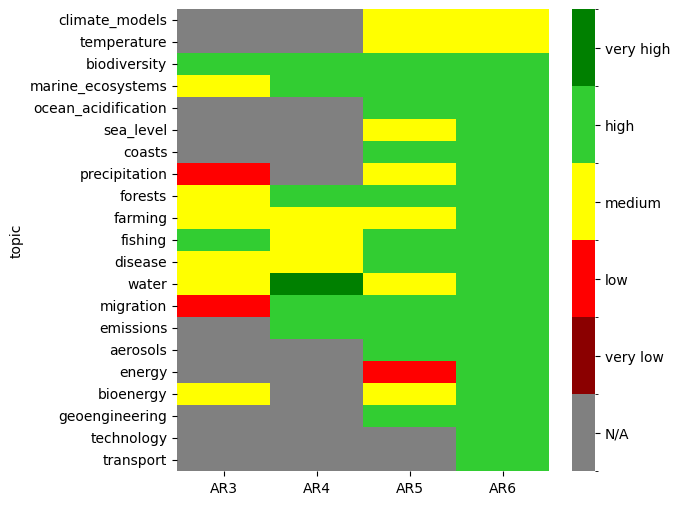

In [23]:
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm


clrs = ["grey", "darkred", "red", "yellow", "limegreen", "green"]
bounds = [-1, 0, 1, 2, 3, 4]
bounds = [-1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5]
cmap = ListedColormap(clrs)
norm = BoundaryNorm(bounds, len(bounds))

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(votes_df, ax=ax, cmap=cmap, norm=norm)

colorbar = ax.collections[0].colorbar
colorbar.set_ticks([-1, 0, 1, 2, 3, 4])
colorbar.set_ticklabels(["N/A", "very low", "low", "medium", "high", "very high"])

plt.show()